## Linear function: signature + fourier

Notation

`X_path`: a collection of path $\mathcal{X}=\{x^{(1)}, x^{(2)}, \dots, x^{(R)}\}\in \mathbb{R}^{R\times n}$ (assuming each sample $x^{(i)}\in \mathbb{R}^{1\times n}$ is a row vector)

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
from main_funcs import sig_Dataset, ifft_aug

e:\File_VSCode\M3R\m3r_venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Initialise dataset

In [2]:
sample_num = 100
test_sample_num = 10
n = 100
f_depth = 5
s_depth = 4
data = sig_Dataset(sample_num=sample_num,
                   n=n,
                   f_depth=f_depth,
                   s_depth=s_depth)
test_data = sig_Dataset(sample_num=test_sample_num,
                        n=n,
                        f_depth=f_depth,
                        s_depth=s_depth)

#### FFT Visualisation

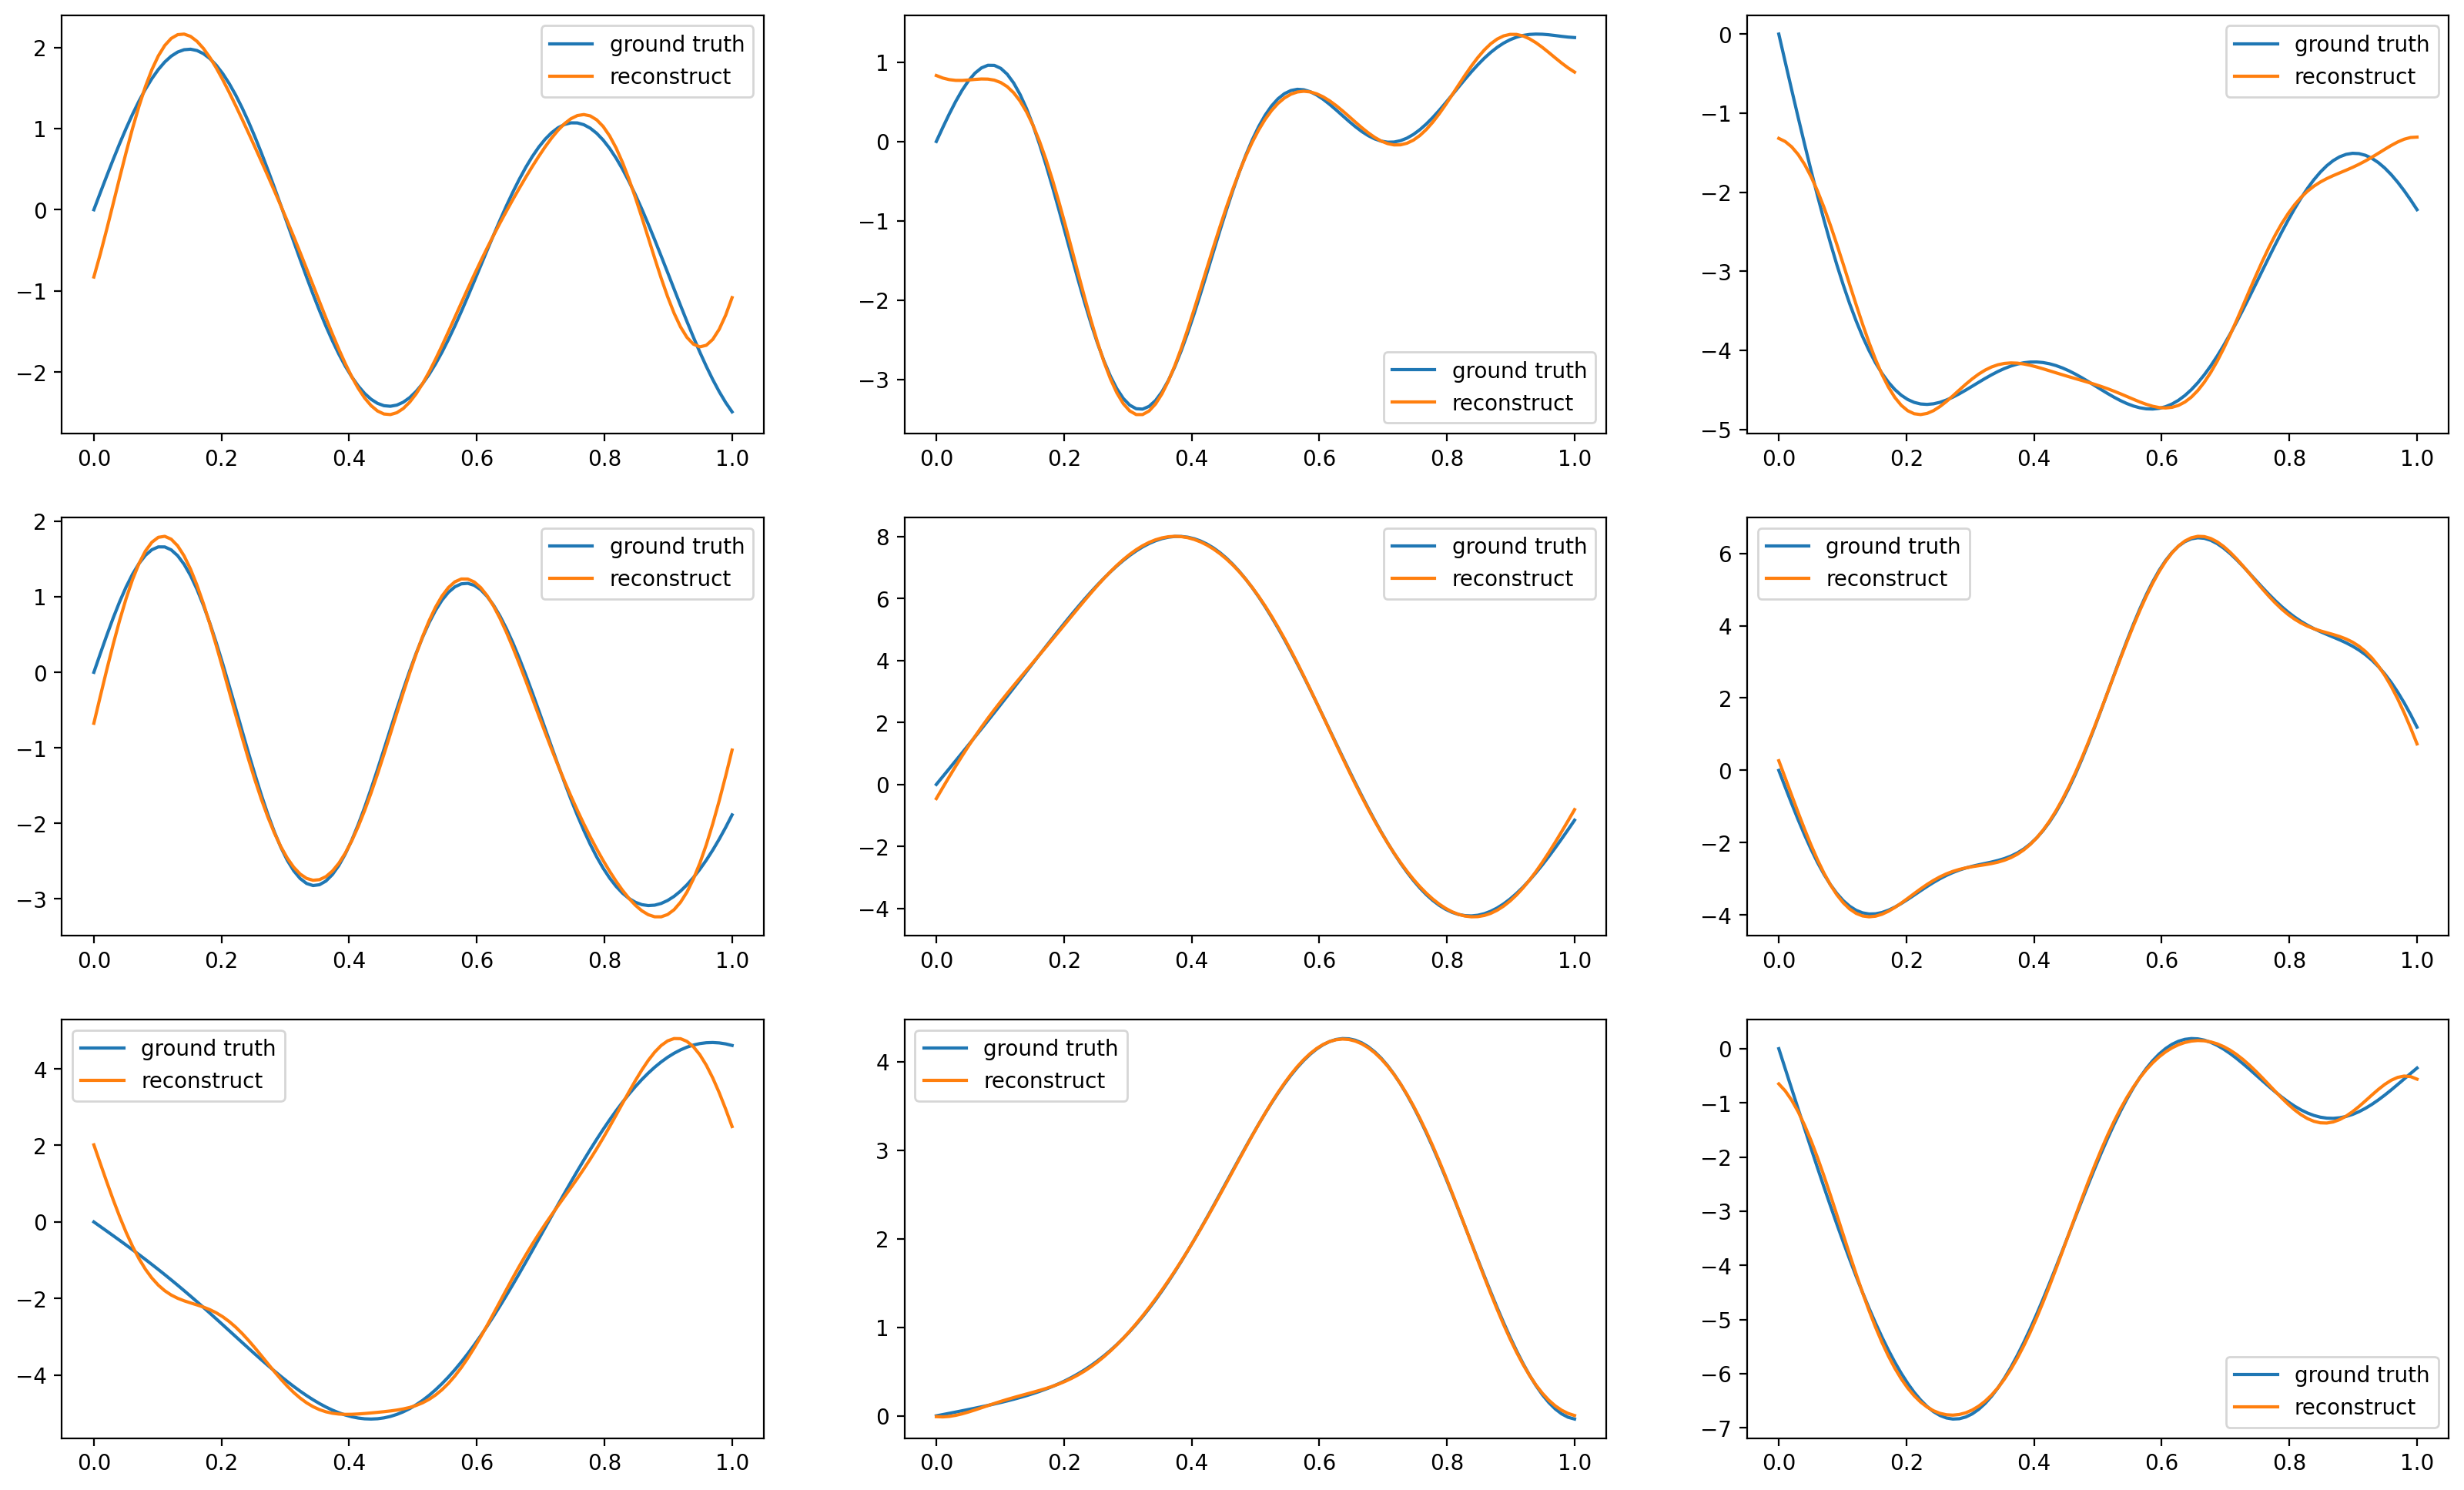

In [3]:
num = 9
plt.figure(figsize=(20, 12), dpi=200)
for idx in range(num):
    example_path = data.path[idx]
    recon_path = data.reconstruct_path(idx=idx).flatten()
    plt.subplot(int(num**0.5), int(num**0.5), idx+1)
    plt.plot(np.linspace(0, 1, n), example_path, label='ground truth')
    plt.plot(np.linspace(0, 1, n), recon_path, label='reconstruct')
    plt.legend()

#### Linear regression model

In [4]:
reg = LinearRegression().fit(data.inputs, data.labels)
# reg = Ridge(alpha=300).fit(data.inputs, data.labels)
# reg = Lasso(alpha=1).fit(data.inputs, data.labels)
# reg =  RandomForestRegressor(max_depth=10, n_estimators=10).fit(data.inputs, data.labels)

#### Predict Performance

In [5]:
train_score = reg.score(data.inputs, data.labels)
test_score = reg.score(test_data.inputs, test_data.labels)
print("training R score: ", train_score)
print("testing R score: ", test_score)

training R score:  0.9034660080980084
testing R score:  0.9069123407976314


In [6]:
reg_coef = reg.predict(data.inputs)
reg_paths = ifft_aug(reg_coef, n=n, f_depth=f_depth)
test_reg_coef = reg.predict(test_data.inputs)
test_reg_paths = ifft_aug(test_reg_coef, n=n, f_depth=f_depth)
print("training MSE error (fourier): ", metrics.mean_squared_error(reg_coef, data.labels))
print("testing MSE error (fourier): ", metrics.mean_squared_error(test_reg_coef, test_data.labels))
print("training MSE error (path): ", metrics.mean_squared_error(reg_paths, data.path))
print("testing MSE error (path): ", metrics.mean_squared_error(test_reg_paths, test_data.path))

training MSE error (fourier):  89.29868557712905
testing MSE error (fourier):  84.21219565270083
training MSE error (path):  0.27988158168175425
testing MSE error (path):  0.22803395958088998


Text(0.5, 0.98, 'training paths')

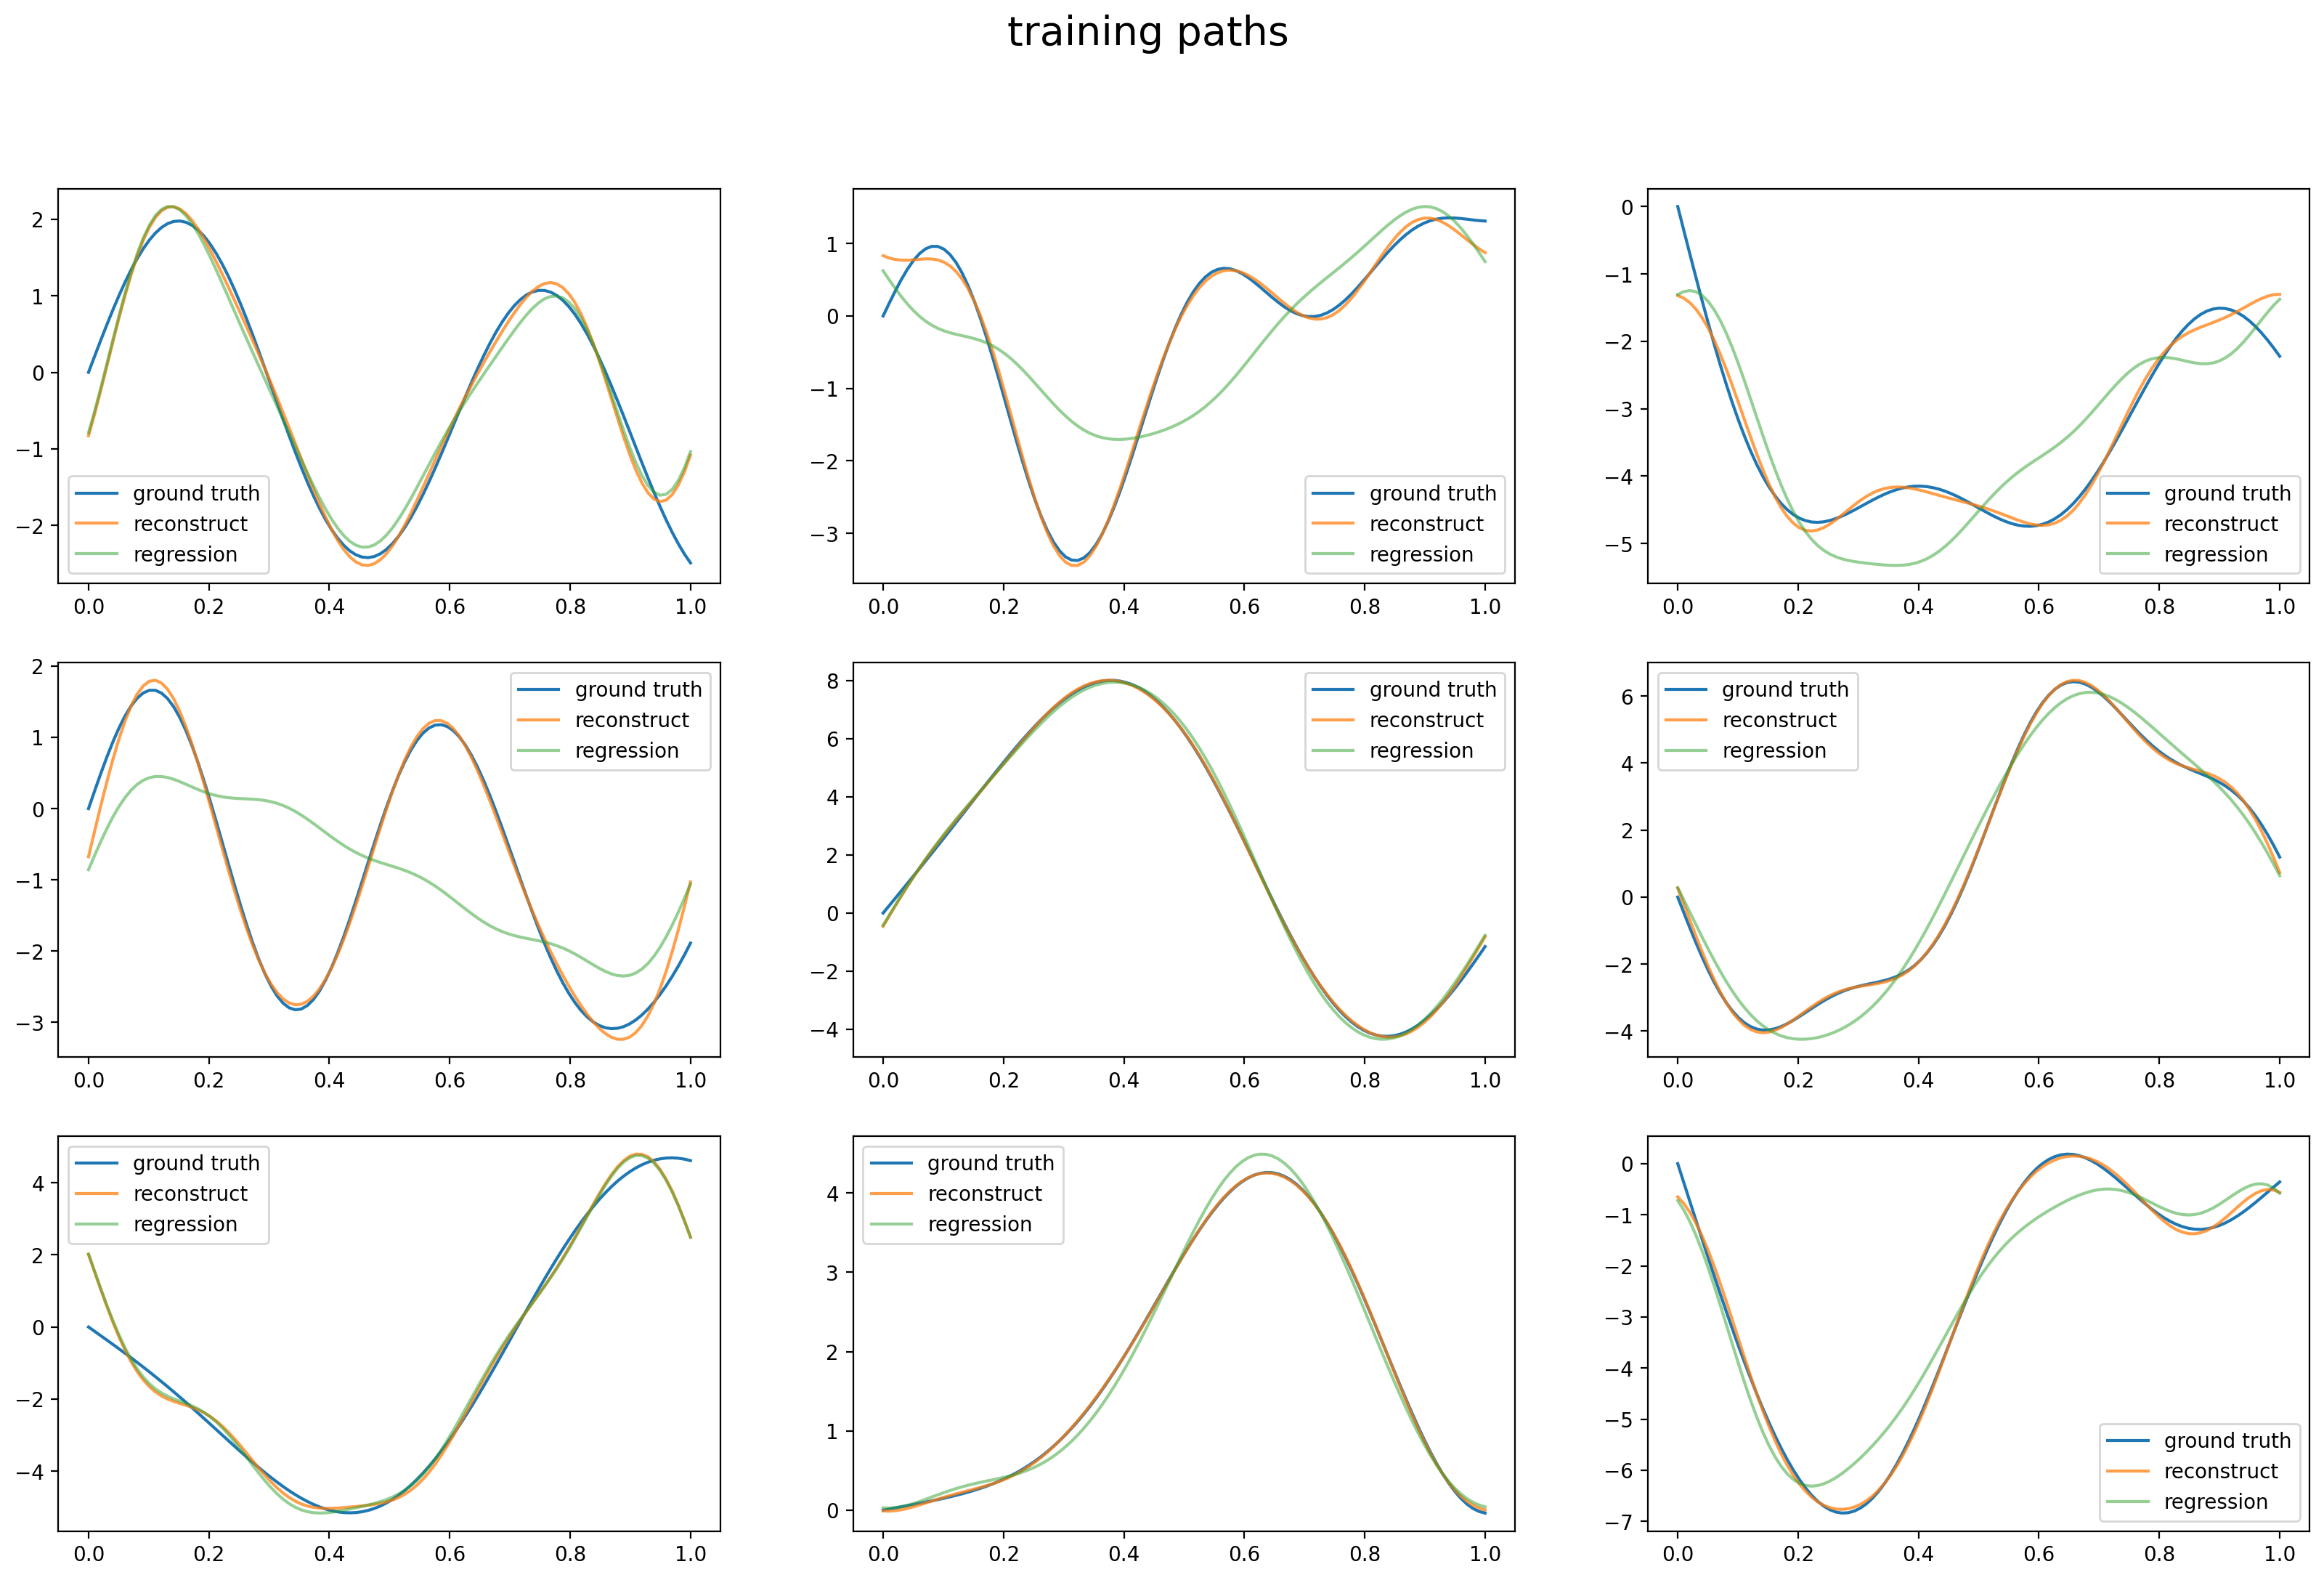

In [7]:
num = 9
plt.figure(figsize=(20, 12), dpi=200)
for idx in range(num):
    example_path = data.path[idx]
    recon_path = data.reconstruct_path(idx=idx).flatten()
    reg_path = reg_paths[idx]
    plt.subplot(int(num**0.5), int(num**0.5), idx+1)
    plt.plot(np.linspace(0, 1, n), example_path, label='ground truth')
    plt.plot(np.linspace(0, 1, n), recon_path, alpha=0.75, label='reconstruct')
    plt.plot(np.linspace(0, 1, n), reg_path, alpha=0.5, label='regression')
    plt.legend()
plt.suptitle('training paths', fontsize=20)

Text(0.5, 0.98, 'test paths')

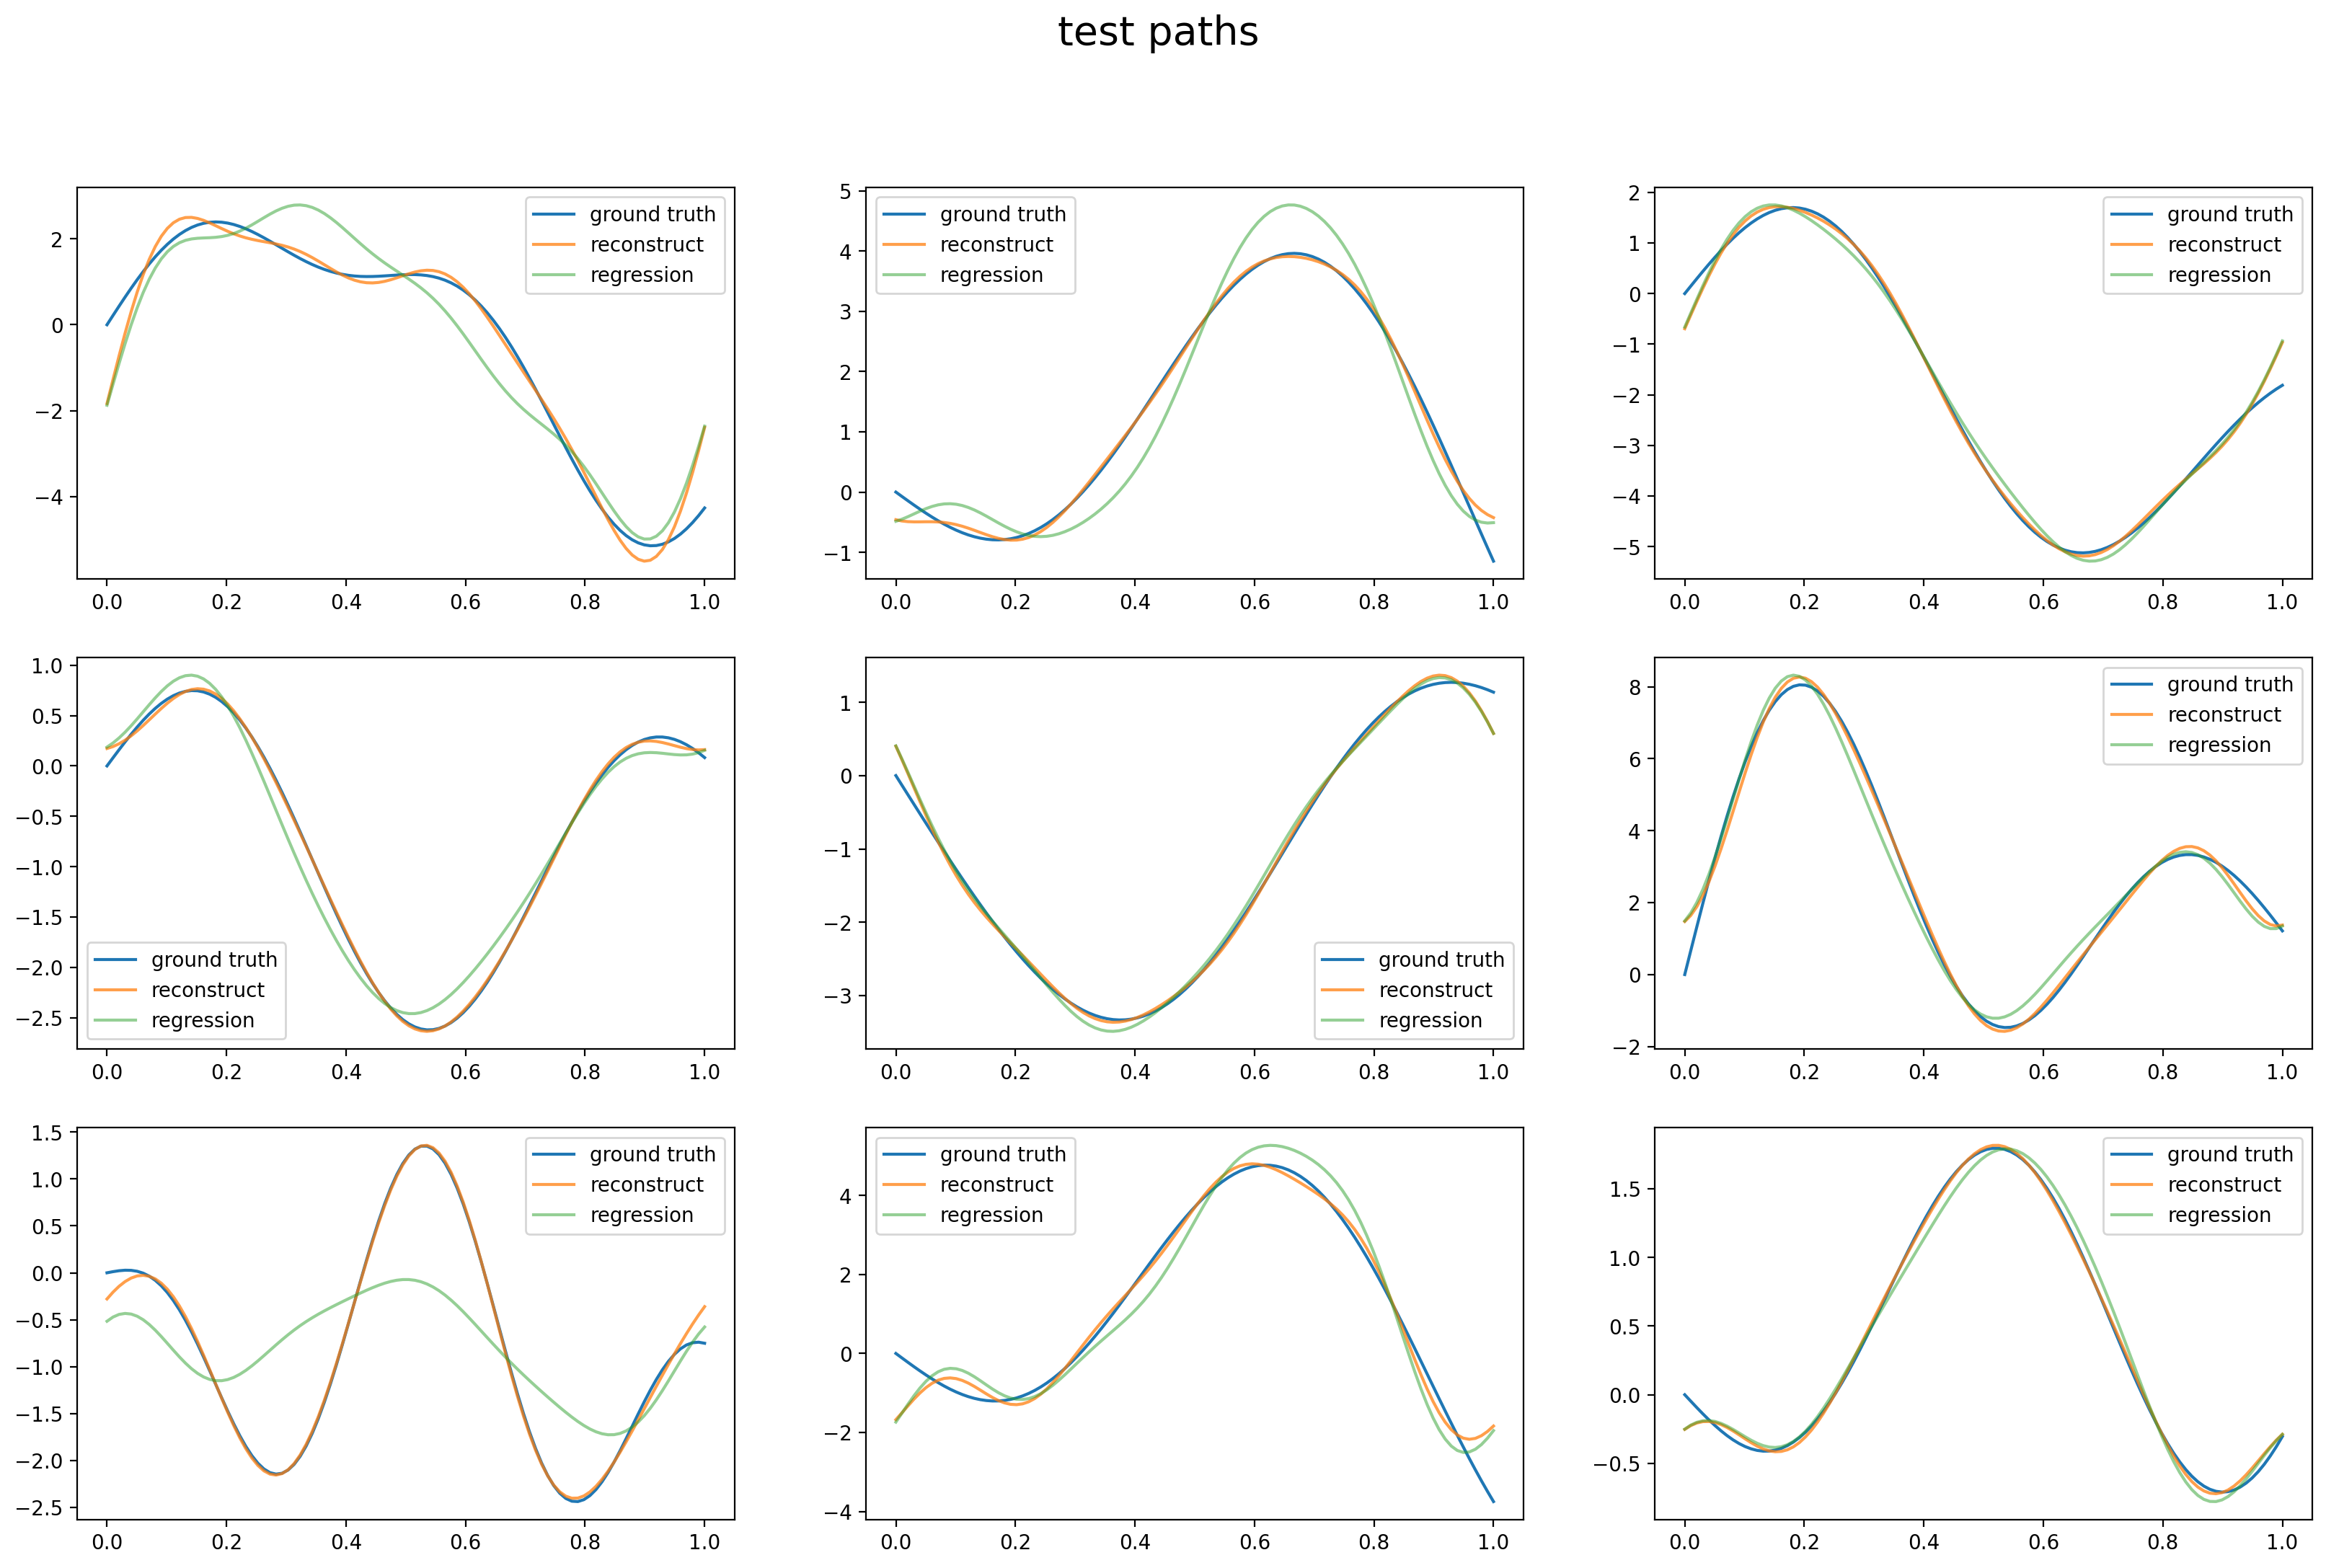

In [8]:
num = 9
plt.figure(figsize=(20, 12), dpi=200)
for idx in range(num):
    test_example_path = test_data.path[idx]
    test_recon_path = test_data.reconstruct_path(idx=idx).flatten()
    test_reg_path = test_reg_paths[idx]
    plt.subplot(int(num**0.5), int(num**0.5), idx+1)
    plt.plot(np.linspace(0, 1, n), test_example_path, label='ground truth')
    plt.plot(np.linspace(0, 1, n), test_recon_path, alpha=0.75, label='reconstruct')
    plt.plot(np.linspace(0, 1, n), test_reg_path, alpha=0.5, label='regression')
    plt.legend()
plt.suptitle('test paths', fontsize=20)